In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector

import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/FoodFlix")


In [4]:
#keep the data
df_original = pd.read_csv("../data/02_intermediate/intermediate.csv", sep=',', low_memory=False)


In [5]:
# je ne garde que les données quantitatives
int_float_df = df_original.select_dtypes(include=['int64', 'float64'])


In [6]:

columns = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g','proteins_100g', 'salt_100g',
       'sodium_100g', 'fruits-vegetables-nuts_100g']


<AxesSubplot:>

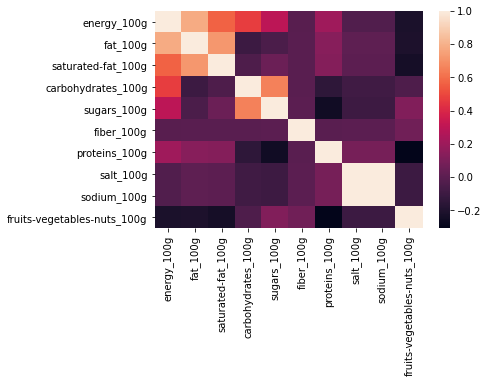

In [7]:
to_heat = int_float_df.loc[:,columns]
sns.heatmap(to_heat.corr())

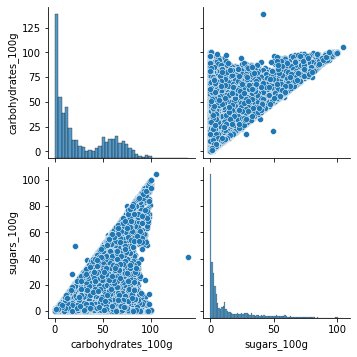

In [8]:
#corrélation entre sugar et glucide
columns3 = ['carbohydrates_100g','sugars_100g']
df_corr3 = int_float_df.loc[:,columns3]
sns.pairplot(df_corr3)
plt.show()

on constate que les glucides sont composés entre autre de sucre, ce qui fait que la teneur en sucre ne peut etre supérieure aux glucides.


In [24]:
df_original.loc[df_original.sugars_100g > df_original.carbohydrates_100g, 'sugars_100g'] = df_original.carbohydrates_100g

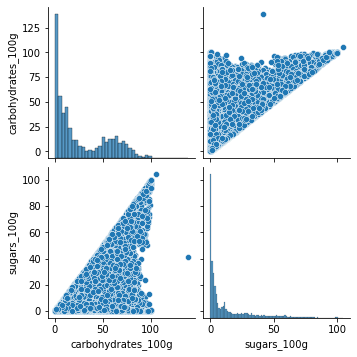

In [26]:
#corrélation entre sugar et glucide
columns3 = ['carbohydrates_100g','sugars_100g']
df_corr3 = df_original.loc[:,columns3]
sns.pairplot(df_corr3)
plt.show()

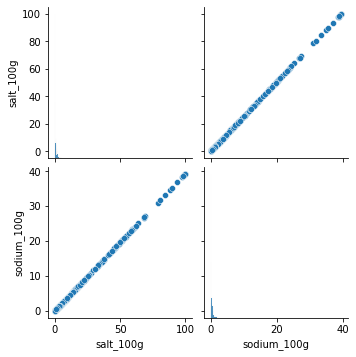

In [9]:
#corrélation entre sel et sodium
columns4 = ['salt_100g','sodium_100g']
df_corr4 = int_float_df.loc[:,columns4]
sns.pairplot(df_corr4)
plt.show()

Le sel est composé à 40% de sodium (notion métier). Cette corrélation est parfaitement visible dans le jeu de donées:pour 100g de sel on a 40g de sodium max.

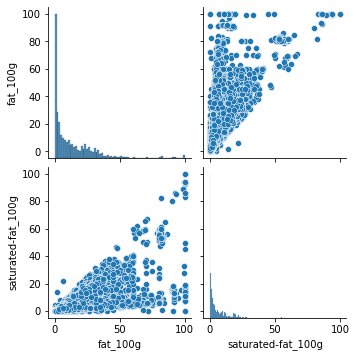

In [10]:
#corrélation entre sturedfat et fat
columns3 = ['fat_100g', 'saturated-fat_100g']
df_corr3 = int_float_df.loc[:,columns3]
sns.pairplot(df_corr3)
plt.show()

on constate que les graisses saturées sont un type de graisse, donc le niveau de graisses saturées ne peut etre supérieur aux graisses.

In [28]:
df_original.loc[df_original['saturated-fat_100g'] > df_original.fat_100g, 'saturated-fat_100g'] = df_original.fat_100g

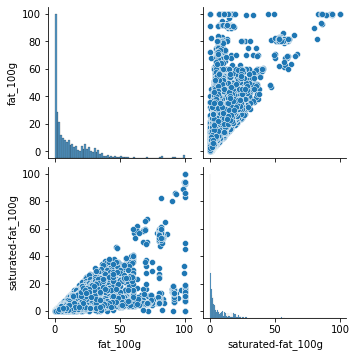

In [29]:
#corrélation entre sturedfat et fat
columns3 = ['fat_100g', 'saturated-fat_100g']
df_corr3 = df_original.loc[:,columns3]
sns.pairplot(df_corr3)
plt.show()

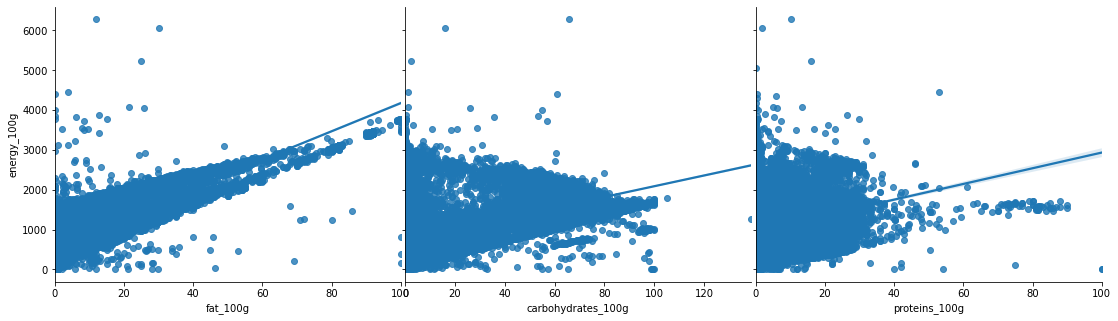

In [11]:

g = sns.PairGrid(int_float_df, y_vars=["energy_100g"], x_vars=['fat_100g', 
                                                   'carbohydrates_100g', 'proteins_100g'], height = 25)
g.map(sns.regplot)
fig=plt.gcf()
fig.set_size_inches(15,4)

# 1. Traitement des Doublons

## 2.1 recherche des doublons

In [12]:
print(df_original.duplicated().value_counts())
df_original.shape

False    29713
True        21
dtype: int64


(29734, 17)

## II.2 Traitement des doublons

In [13]:
df_original.drop_duplicates(keep='last',inplace=True)
print(df_original[df_original.duplicated(keep=False)])
df_original.shape

Empty DataFrame
Columns: [product_name, generic_name, brands, categories, nutrition_grade_fr, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, fruits-vegetables-nuts_100g, nutrition-score-fr_100g, nutrition-score-uk_100g]
Index: []


(29713, 17)

# 3.Consistance, reformatage et valeurs abbérantes.

## 3.1 Evaluer la consistance des variables de type caractère.

#### Afficher l'ensemble des valeurs uniques

In [14]:
df_original["product_name"].value_counts()

Mayonnaise                         20
Huile d'olive vierge extra         20
Mozzarella                         18
Moutarde de Dijon                  17
Jus d'orange                       16
                                   ..
Energy bar Pomme                    1
Meringues                           1
Griotte Cerise noire                1
Fruit & chocolat noir 70% cacao     1
Filet de sardines                   1
Name: product_name, Length: 26648, dtype: int64

pour les produits sur-représentés il convient de vérifier quelle valeur est la bonne

certains produits ont plusieurs occurences, je vais les fusionner en une ligne dont les valeurs quantitatives seront la moyenne des précédentes.

In [17]:

df_v2 = df_original.groupby('product_name').agg({'product_name':'first',
                                      'generic_name':'first',
                                      'brands':'first',
                                      'categories':'first',                                    
                                      'energy_100g':'mean',
                                     'sugars_100g':'mean',
                                      'carbohydrates_100g':'mean',
                                     'fiber_100g':'mean',
                                     'proteins_100g':'mean',
                                      'salt_100g':'mean',
                                     'sodium_100g':'mean',
                                        'fat_100g':'mean',
                                     'saturated-fat_100g':'mean',
                                      'fruits-vegetables-nuts_100g':'mean',
                                     'nutrition-score-fr_100g':'mean',
                                     'nutrition-score-uk_100g':'mean'
                                     }).round(2)


#check
df_v2["product_name"].value_counts()

Pizza 3 fromages cuite au feu de bois                             1
La Crème Dessert A la Pistache                                    1
Cocotte de Petit Épeautre, Courgettes et Pignons                  1
Ch'ti blonde                                                      1
Printiligne, Lait Stérilisé Uht écrémé 0% De MG, La Bouteille,    1
                                                                 ..
Jambon fumé supérieur                                             1
Chocolat de couverture noir 72%                                   1
Citron Vert cuit au chaudron                                      1
 la madeleine au beurre frais                                     1
Fromage de Chèvre Sainte-Maure (format familial)                  1
Name: product_name, Length: 26648, dtype: int64

In [18]:
#j'utilise l'exemple de la mayonnaise pour verifier mes actions
s_before = df_original[df_original.loc[:,'product_name']=='Mayonnaise']
s_before

,product_name,generic_name,brands,categories,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2143,Mayonnaise,NaN,Benedicta,"Epicerie,Sauces,Mayonnaises",e,2732.0,NaN,5.40,NaN,1.30,0.0,1.2,1.40,0.551181,NaN,19.0,19.0
4136,Mayonnaise,Mayonnaise à la moutarde de Dijon,Carrefour,"Epicerie,Sauces,Mayonnaises,Mayonnaises de Dijon",e,2733.0,72.0,6.00,1.90,1.20,NaN,1.4,1.50,0.590551,NaN,19.0,19.0
4267,Mayonnaise,NaN,La william,NaN,e,3519.0,NaN,14.90,NaN,0.10,0.1,1.9,1.30,0.511811,NaN,25.0,25.0
6849,Mayonnaise,NaN,Heinz,"Epicerie,Sauces,Mayonnaises",e,2750.0,72.0,11.00,3.00,3.00,NaN,1.1,1.10,0.433071,NaN,22.0,22.0
7261,Mayonnaise,NaN,Mericq,"Epicerie,Sauces,Mayonnaises",e,3041.0,81.0,12.02,0.70,0.20,NaN,1.9,1.22,0.480315,NaN,24.0,24.0
8763,Mayonnaise,NaN,Hema,NaN,e,3038.0,NaN,6.20,NaN,4.20,0.2,1.4,1.75,0.688976,NaN,22.0,22.0
10405,Mayonnaise,Mayonnaise en stick,Gyma,"Sauces,Mayonnaises",e,2656.0,70.0,6.00,2.80,2.00,NaN,0.9,1.80,0.708661,NaN,19.0,19.0
14845,Mayonnaise,NaN,Ülker,Mayonnaises,d,2757.0,73.0,7.30,2.40,2.00,NaN,0.9,0.50,0.196850,NaN,17.0,17.0
15927,Mayonnaise,Mayonnaise,"Quick,Soreal","Epicerie,Sauces,Suppléments,Mayonnaises,Supplé...",b,404.0,10.6,0.90,0.03,0.01,NaN,0.2,0.20,0.078740,NaN,1.0,1.0
16029,Mayonnaise,Mayonnaise,Bouton d'Or,"en:groceries, en:sauces, en:mayonnaises",d,2736.0,70.7,6.00,3.20,2.40,NaN,1.1,1.08,0.425197,NaN,17.0,17.0


In [19]:
#j'utilise l'exemple de la mayonnaise pour verifier mes actions
s_after = df_v2[df_v2.loc[:,'product_name']=='Mayonnaise']
s_after


,product_name,generic_name,brands,categories,energy_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fat_100g,saturated-fat_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,
Mayonnaise,Mayonnaise,Mayonnaise à la moutarde de Dijon,Benedicta,"Epicerie,Sauces,Mayonnaises",2749.21,1.34,1.63,0.08,1.14,1.15,0.45,70.68,6.89,0.0,17.79,18.42


### Traitement des valeurs manquantes

In [20]:
#recherche des valeurs manquantes:

print(df_v2.isna().sum())
print(df_v2.shape)

product_name                       0
generic_name                   16217
brands                           272
categories                      8584
energy_100g                     3626
sugars_100g                     4047
carbohydrates_100g              7575
fiber_100g                     10926
proteins_100g                   3686
salt_100g                       4028
sodium_100g                     4029
fat_100g                        7488
saturated-fat_100g              4058
fruits-vegetables-nuts_100g    25791
nutrition-score-fr_100g         4388
nutrition-score-uk_100g         4388
dtype: int64
(26648, 16)


comme il s'agit ici de calculer un score, je remplace toutes les valeurs Nan par zéro.

In [21]:
df_v2 = df_original.fillna(0)

In [22]:
print(df_v2.isna().sum())
print(df_v2.shape)

product_name                   0
generic_name                   0
brands                         0
categories                     0
nutrition_grade_fr             0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
fruits-vegetables-nuts_100g    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
dtype: int64
(29713, 17)


on constate que les Nan ont bien été modifiées.

## 3.2 Evaluer la consistance des variables de type numérique

#### Afficher la distribution d'une variable numérique

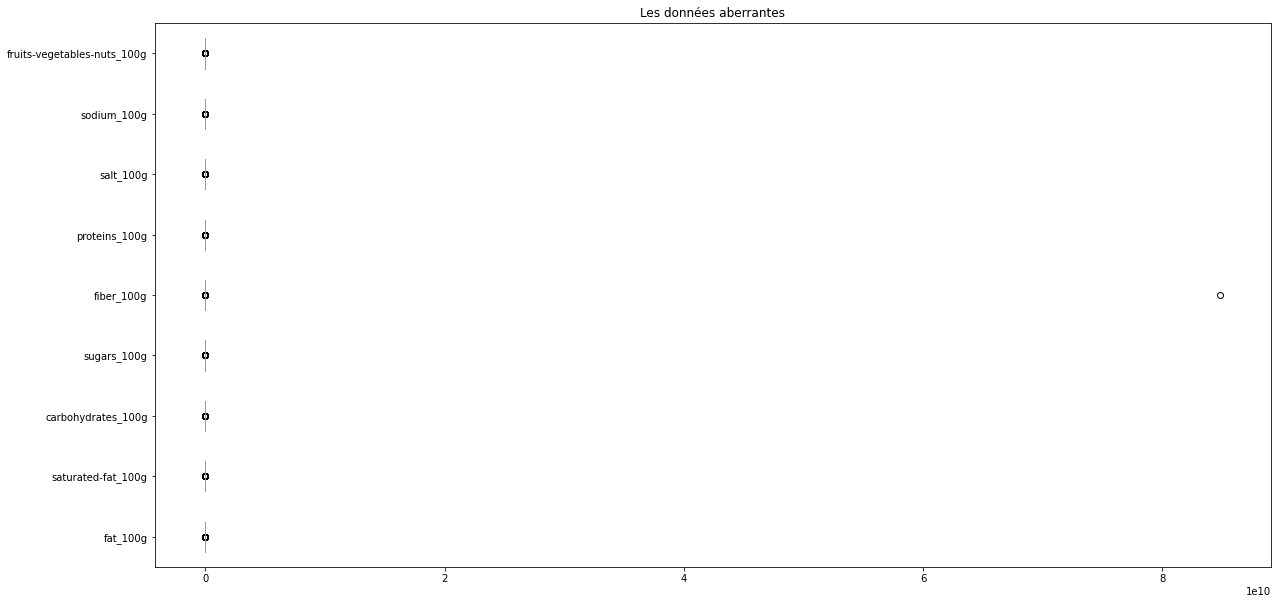

In [23]:
data = [ df_v2['fat_100g'], df_v2['saturated-fat_100g'],df_v2['carbohydrates_100g'],df_v2['sugars_100g'],df_v2['fiber_100g'],df_v2['proteins_100g'],df_v2['salt_100g'],df_v2['sodium_100g'],df_v2['fruits-vegetables-nuts_100g']]
plt.figure(figsize = (20,10))
ax = plt.boxplot(data, whis=[5,95], vert=False)


plt.title('Les données aberrantes')
plt.yticks([1, 2, 3,4,5,6,7,8,9], ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g' ])


plt.show()   

il s'agit de valeurs quantitatif pour 100g de produit ces valeurs ne peuvent donc ni etre négatives ni supérieures à 100

In [106]:
columns=['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'fruits-vegetables-nuts_100g']

for col in columns:
    df_v2.loc[df_v2[col]> 100, col] = 0
    

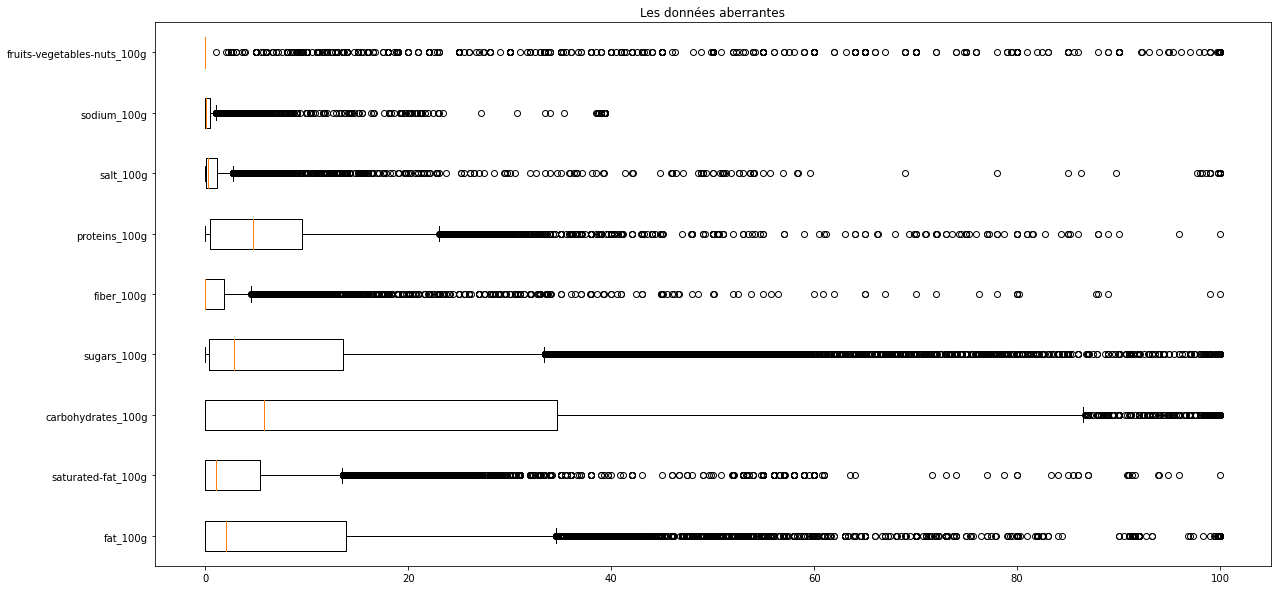

In [107]:
plt.figure(figsize = (20,10))
ax = plt.boxplot(data, vert=False)


plt.title('Les données aberrantes')
plt.yticks([1, 2, 3,4,5,6,7,8,9], ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g' ])

plt.show()   

#### Traiter les valeurs impossibles

l'énergie d'un aliment ne peut pas être supérieure à 4000KJ (notion métier)

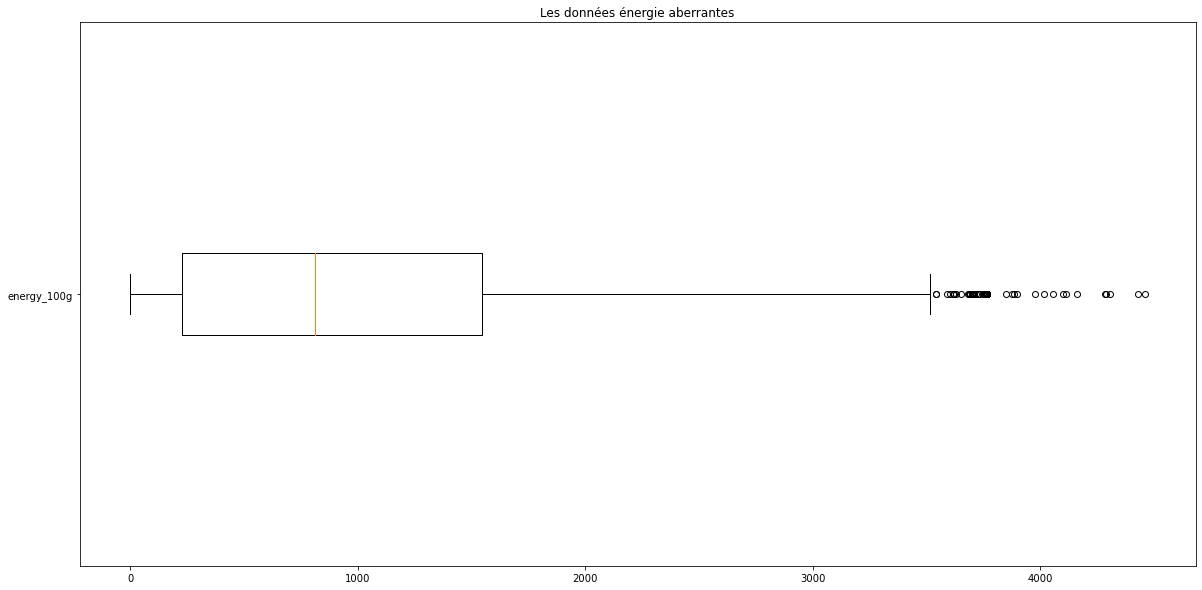

In [108]:
plt.figure(figsize = (20,10))
ax = plt.boxplot(df_v2['energy_100g'], vert=False)

plt.title('Les données énergie aberrantes')
plt.yticks([1], ['energy_100g' ])

plt.show()   

In [109]:
df_v3 = df_v2[df_v2['energy_100g']<4000]

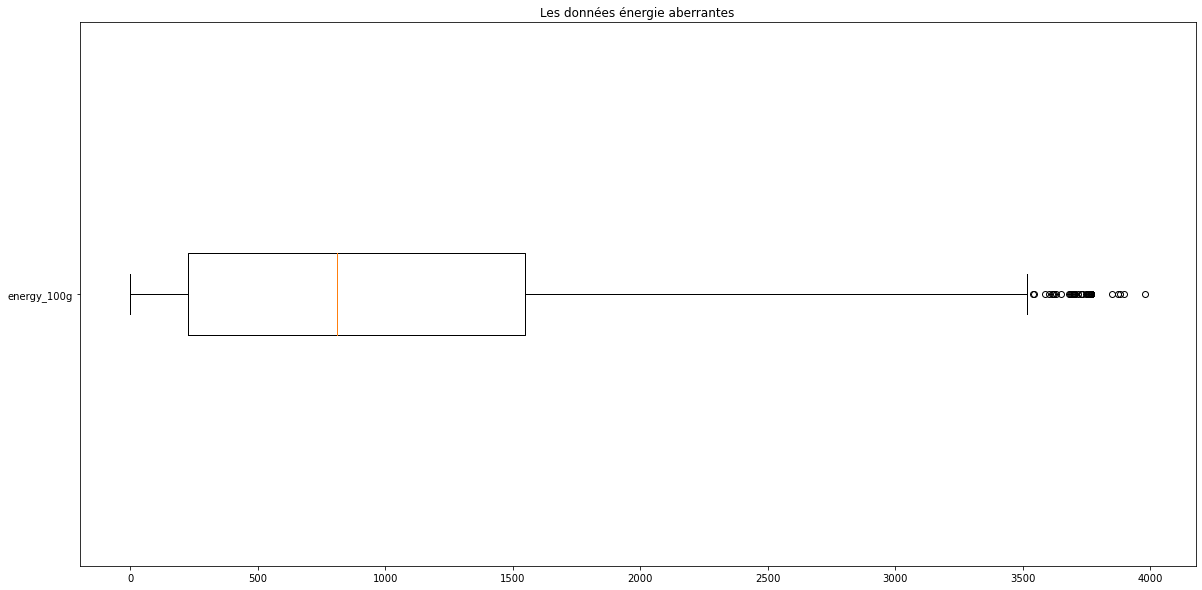

In [110]:
plt.figure(figsize = (20,10))
ax = plt.boxplot(df_v3['energy_100g'], vert=False)

plt.title('Les données énergie aberrantes')
plt.yticks([1], ['energy_100g' ])

plt.show()   

# sauvegarde du jeu de données nettoyées

In [111]:
df_v3.to_csv("../data/02_intermediate/final.csv")